In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv('./nombre_depanes_par_jour.csv', encoding='latin-1',sep=";",index_col="Date début", parse_dates=True)
df=df.asfreq("D")
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10'],
              dtype='datetime64[ns]', name='Date début', length=1165, freq='D')

In [2]:
df.describe()

,Number of Orders
count,1165.000000
mean,8.193991
std,6.077546
min,0.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,57.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1165 entries, 2019-01-01 to 2022-03-10
Freq: D
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number of Orders  1165 non-null   float64
dtypes: float64(1)
memory usage: 18.2 KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1165 entries, 2019-01-01 to 2022-03-10
Freq: D
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number of Orders  1165 non-null   float64
dtypes: float64(1)
memory usage: 18.2 KB


In [5]:
df.head()

,Number of Orders
Date début,
2019-01-01,9.0
2019-01-02,9.0
2019-01-03,15.0
2019-01-04,8.0
2019-01-05,7.0


In [6]:
df.insert(0,'null','')
df['null'] = 0

In [7]:
msk=(df.index<'2021-07-30')
df_train=df[msk].copy()
df_test=df[~msk].copy()

In [8]:
x_train=df_train.drop(['Number of Orders'], axis=1)

In [9]:
x_test=df_test.drop(['Number of Orders'], axis=1)

In [10]:
y_train=df_train[['Number of Orders']]

In [11]:
y_test=df_test[['Number of Orders']]

In [12]:
from xgboost import XGBRegressor

In [13]:
xg_reg=XGBRegressor()

In [14]:
xg_fit=xg_reg.fit(x_train, y_train)

In [15]:
 y_pred=xg_fit.predict(x_test)

In [16]:
df['forecast_xgboost'] = [None]*len(df_train) + list(y_pred)

In [17]:
df = df.drop('null', axis=1)

<AxesSubplot:xlabel='Date début'>

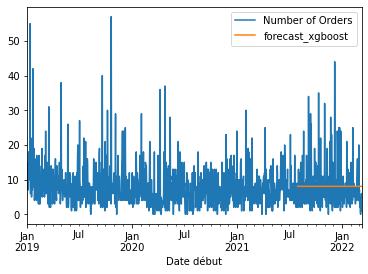

In [18]:
df.plot()

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
r2= r2_score( y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'mae - xg: {mae}')
print(f'r2 - xg: {r2}')
print(f'rmse - xg: {rmse}')

mae - xg: 4.563662341662815
r2 - xg: -0.01000944238655288
rmse - xg: 6.859215326846978
